In [51]:
# Import useful libraries
import cv2
import numpy as np
import skimage.color as clr
import skimage.transform as trf
import skimage.util as uti
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
from copy import copy
from matplotlib import pyplot as plt

(-0.5, 63.5, 63.5, -0.5)

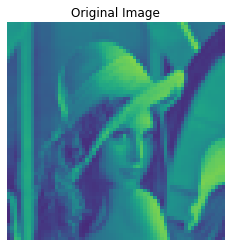

In [91]:
# read in the image, convert it to the right size 64x64 and plot for verification
im = cv2.imread('lena.png')
im = clr.rgb2gray(im)
im = uti.img_as_ubyte(trf.resize(im, (64,64)))

plt.imshow(im, vmin=0, vmax=255)
plt.title('Original Image')
plt.axis('off')

In [93]:
# chunk image procedure in blocks 4x4 and verify it works
blk_size = 4
n_blk = int(64/blk_size)
#fig, axs = plt.subplots(n_blk, n_blk)
#for i in range(n_blk**2):
#    axs[int(i//n_blk), int(i%n_blk)].imshow(im[blk_size*int(i//n_blk):blk_size*(int(i//n_blk)+1), blk_size*int(i%n_blk):blk_size*(int(i%n_blk)+1)], vmin=0, vmax=255)
#    axs[int(i//n_blk), int(i%n_blk)].axis('off')

(-0.5, 63.5, 63.5, -0.5)

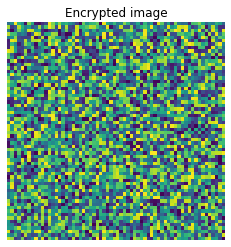

In [94]:
# Encryption of each 4x4 blocks (16 bytes of data) by AES-256 method and show encrypted image
enc_im = copy(im)
key = get_random_bytes(16)
cipher = AES.new(key, AES.MODE_EAX)
nonce =cipher.nonce
for i in range(n_blk**2):
    subim = im[blk_size*int(i//n_blk):blk_size*(int(i//n_blk)+1), blk_size*int(i%n_blk):blk_size*(int(i%n_blk)+1)]
    enc_im[blk_size*int(i//n_blk):blk_size*(int(i//n_blk)+1), blk_size*int(i%n_blk):blk_size*(int(i%n_blk)+1)] = np.reshape(np.frombuffer(cipher.encrypt(subim.tobytes()), dtype = subim.dtype), subim.shape)
plt.imshow(enc_im, vmin=0, vmax=255)
plt.title('Encrypted image')
plt.axis('off')

In [86]:
# model your attack here


(-0.5, 63.5, 63.5, -0.5)

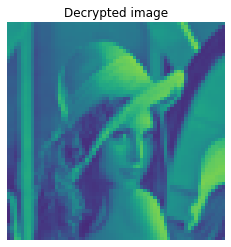

In [92]:
# Decryption and show decrypted image
dec_im = copy(enc_im)
cipher = AES.new(key, AES.MODE_EAX, nonce=nonce)
for i in range(n_blk**2):
    subim = enc_im[blk_size*int(i//n_blk):blk_size*(int(i//n_blk)+1), blk_size*int(i%n_blk):blk_size*(int(i%n_blk)+1)]
    dec_im[blk_size*int(i//n_blk):blk_size*(int(i//n_blk)+1), blk_size*int(i%n_blk):blk_size*(int(i%n_blk)+1)] = np.reshape(np.frombuffer(cipher.decrypt(subim.tobytes()), dtype = subim.dtype), subim.shape)
plt.imshow(dec_im, vmin=0, vmax=255)
plt.title('Decrypted image')
plt.axis('off')